In [ ]:
#EDA

In [18]:
import pandas as pd

In [19]:
iot_data = pd.read_csv("/Users/raushan/Documents/coding-challenge-raushan/data_0.csv", delimiter=";")
len(iot_data)

50000

In [20]:
iot_data.head()

,Unnamed: 0,timestamp,sensor_uuid,sensor_value
0,0,2012-12-31 23:53:00+01:00,f70308a6-3123-475b-8ef0-3baaf1ffce6b,-240.945587
1,1,2012-12-31 23:53:00+01:00,a7180a6d-e011-40f3-a8a8-62a26f0ce584,-1204.949230
2,2,2012-12-31 23:53:00+01:00,432d621c-5dbe-48ee-a3ee-daab27239d81,85.063882
3,3,2012-12-31 23:53:00+01:00,498ce39d-f77e-491b-9c07-b37bce1146d5,-25.102988
4,4,2012-12-31 23:53:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,220.327130


In [21]:
iot_data.describe()

,Unnamed: 0,sensor_value
count,50000.000000,50000.000000
mean,24999.500000,-687.985109
std,14433.901067,13313.316336
min,0.000000,-297222.832277
25%,12499.750000,-91.640045
50%,24999.500000,1.696005
75%,37499.250000,97.092170
max,49999.000000,4352.041875


In [22]:
print(iot_data.columns)

Index(['Unnamed: 0', 'timestamp', 'sensor_uuid', 'sensor_value'], dtype='object')


In [23]:
# Convert timestamp to datetime for better plotting
iot_data['timestamp'] = pd.to_datetime(iot_data['timestamp'])
iot_data

,Unnamed: 0,timestamp,sensor_uuid,sensor_value
0,0,2012-12-31 23:53:00+01:00,f70308a6-3123-475b-8ef0-3baaf1ffce6b,-240.945587
1,1,2012-12-31 23:53:00+01:00,a7180a6d-e011-40f3-a8a8-62a26f0ce584,-1204.949230
2,2,2012-12-31 23:53:00+01:00,432d621c-5dbe-48ee-a3ee-daab27239d81,85.063882
3,3,2012-12-31 23:53:00+01:00,498ce39d-f77e-491b-9c07-b37bce1146d5,-25.102988
4,4,2012-12-31 23:53:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,220.327130
...,...,...,...,...
49995,49995,2013-01-02 00:52:00+01:00,cfe69ccf-452f-4cfe-be8f-cf1d4a075d0d,89.185734
49996,49996,2013-01-02 00:52:00+01:00,eccbc3aa-0b0b-42ec-9d98-9e220beb6eb9,-35.065768
49997,49997,2013-01-02 00:52:00+01:00,d2eb3ad3-060d-48c2-9948-cce7ec0f4789,193.112449
49998,49998,2013-01-02 00:52:00+01:00,811f0da9-5d8e-4284-9e40-d40f4fa12d17,30.624214


In [27]:
unique_sensors = iot_data['sensor_uuid'].unique()
unique_sensors

array(['f70308a6-3123-475b-8ef0-3baaf1ffce6b',
       'a7180a6d-e011-40f3-a8a8-62a26f0ce584',
       '432d621c-5dbe-48ee-a3ee-daab27239d81',
       '498ce39d-f77e-491b-9c07-b37bce1146d5',
       'fcfeb19a-37a1-4698-8f2e-1d0a54832d1e',
       '77fcc96f-e773-4271-9797-e038d99f5906',
       '2262ce99-374b-4364-8134-630c95bcce78',
       '44378155-7836-455b-a661-996ed37fabee',
       '28badfb4-7300-4caf-87f5-5f9b48c51a02',
       '290ec0bb-aba6-4316-9408-0f627bc96f32',
       'dc29d3c0-ec41-4cf0-bcd2-c88a5081c48f',
       'a5078bdc-82a5-4d8d-a438-6699691976d7',
       '041ace96-1c9f-4f89-98e5-5d50bd6ed54f',
       'aa8e2667-0d3d-4260-9777-b6979d968e9a',
       'fb3b76c6-23db-4637-9bff-df64c92c28e9',
       'd6a54cdf-8d32-49a5-87bc-3f11b7d4efa5',
       '868732ed-fae6-4a0a-9812-020afecebcdf',
       'f3217423-891e-497b-b6b1-2733c648383b',
       'd56c7d84-8b8b-4f2d-ba5d-d8dfcc6b3bfe',
       '610ae49a-efbe-4d9e-9798-5179eca7487c',
       'e90f792b-2ae8-4111-9a6d-a44d24b12ad0',
       'af4a7

In [28]:
len(unique_sensors)

500

In [29]:
import matplotlib.pyplot as plt

In [30]:
sample_unique_sensors = unique_sensors[:10] # 10 sample

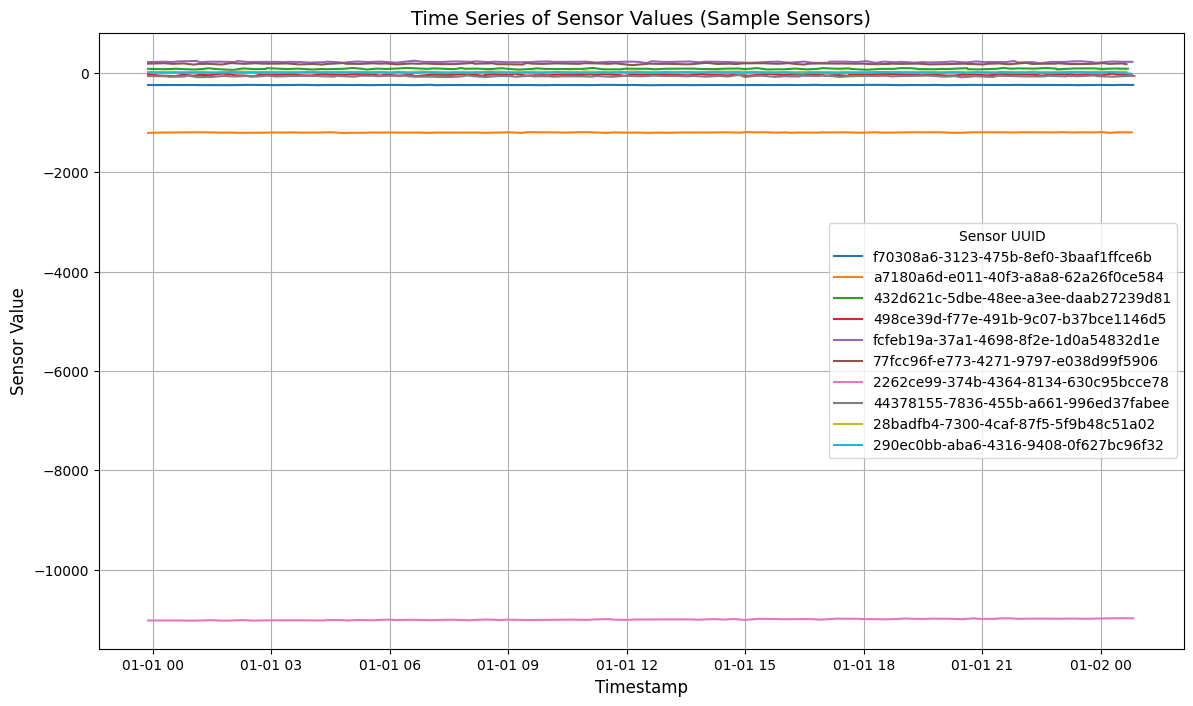

In [31]:

plt.figure(figsize=(14, 8))
for sensor in sample_unique_sensors:
    sd = iot_data[iot_data['sensor_uuid'] == sensor]
    plt.plot(sd['timestamp'], sd['sensor_value'], label=sensor)

plt.title('Time Series of Sensor Values (Sample Sensors)', fontsize=14)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Sensor Value', fontsize=12)
plt.legend(title='Sensor UUID')
plt.grid(True)
plt.show()



In [94]:
# picking a sensor for anomalies detection

picked_sensor = 'fcfeb19a-37a1-4698-8f2e-1d0a54832d1e'

In [95]:
p_iot_data = iot_data[iot_data['sensor_uuid'] == picked_sensor]
p_iot_data.head()

,Unnamed: 0,timestamp,sensor_uuid,sensor_value
4,4,2012-12-31 23:53:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,220.327130
856,856,2013-01-01 00:19:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,228.845146
1214,1214,2013-01-01 00:29:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,220.373252
1506,1506,2013-01-01 00:38:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,233.961887
2477,2477,2013-01-01 01:07:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,243.822744


In [96]:
sv = p_iot_data["sensor_value"]
sv

4        220.327130
856      228.845146
1214     220.373252
1506     233.961887
2477     243.822744
            ...    
47764    220.503744
48012    205.510349
48796    232.192157
49247    227.350087
49835    225.216234
Name: sensor_value, Length: 100, dtype: float64

In [97]:
import ruptures as rpt

In [98]:
# change point for contiguous subset of the time series data (segment)
pen = max(10, len(sv) * 0.01)  # Change point by l2
algo = rpt.Pelt(model="l2").fit(sv.values)
change_points = algo.predict(pen=pen)
change_points

[5, 10, 15, 20, 25, 30, 35, 40, 45, 55, 65, 70, 75, 80, 100]

In [99]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [100]:
# fit piecewise regression model


p_iot_data = p_iot_data.copy()

# Initialize the "fitted" column with NaN
p_iot_data["fitted"] = np.nan

# Add the starting change point (0) to the list of change points
change_points = [0] + change_points

# Fit piecewise regression for each segment
for i in range(len(change_points) - 1):
    start, end = change_points[i], change_points[i + 1]
    segment = p_iot_data.iloc[start:end]
    X = np.arange(len(segment)).reshape(-1, 1)
    y = segment["sensor_value"].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict values and assign to the "fitted" column
    predicted = model.predict(X)
    p_iot_data.loc[segment.index, "fitted"] = predicted.flatten()


In [101]:
p_iot_data["residual"] = p_iot_data["sensor_value"] - p_iot_data["fitted"]

p_iot_data.head()

,Unnamed: 0,timestamp,sensor_uuid,sensor_value,fitted,residual
4,4,2012-12-31 23:53:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,220.327130,219.044438,1.282692
856,856,2013-01-01 00:19:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,228.845146,224.255235,4.589911
1214,1214,2013-01-01 00:29:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,220.373252,229.466032,-9.092780
1506,1506,2013-01-01 00:38:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,233.961887,234.676829,-0.714942
2477,2477,2013-01-01 01:07:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,243.822744,239.887626,3.935118


In [102]:
# calculate standard deviation - how spreaded the data is in relation to the mean

std_deviation = np.std(p_iot_data["residual"].dropna())
std_deviation

np.float64(8.565455837014575)

In [103]:
#  Anomalies Threshold

# Specifying how much standard deviations away from the mean a residual needs to be to be considered an anomaly.
std_threshold = 3.0 

In [104]:
p_iot_data['residual_threshold'] = (std_threshold * std_deviation)

p_iot_data.head()

,Unnamed: 0,timestamp,sensor_uuid,sensor_value,fitted,residual,residual_threshold
4,4,2012-12-31 23:53:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,220.327130,219.044438,1.282692,25.696368
856,856,2013-01-01 00:19:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,228.845146,224.255235,4.589911,25.696368
1214,1214,2013-01-01 00:29:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,220.373252,229.466032,-9.092780,25.696368
1506,1506,2013-01-01 00:38:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,233.961887,234.676829,-0.714942,25.696368
2477,2477,2013-01-01 01:07:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,243.822744,239.887626,3.935118,25.696368


In [107]:
# Calculate Anomalies

p_iot_data["is_anomaly"] = np.abs(p_iot_data["residual"]) > p_iot_data["residual_threshold"]
p_iot_data.head()

,Unnamed: 0,timestamp,sensor_uuid,sensor_value,fitted,residual,residual_threshold,is_anomaly
4,4,2012-12-31 23:53:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,220.327130,219.044438,1.282692,25.696368,False
856,856,2013-01-01 00:19:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,228.845146,224.255235,4.589911,25.696368,False
1214,1214,2013-01-01 00:29:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,220.373252,229.466032,-9.092780,25.696368,False
1506,1506,2013-01-01 00:38:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,233.961887,234.676829,-0.714942,25.696368,False
2477,2477,2013-01-01 01:07:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,243.822744,239.887626,3.935118,25.696368,False


In [108]:
# Extract Anomalies
anomalies = p_iot_data[p_iot_data["is_anomaly"]]
anomalies

,Unnamed: 0,timestamp,sensor_uuid,sensor_value,fitted,residual,residual_threshold,is_anomaly
45183,45183,2013-01-01 22:28:00+01:00,fcfeb19a-37a1-4698-8f2e-1d0a54832d1e,197.352183,223.056888,-25.704706,25.696368,True


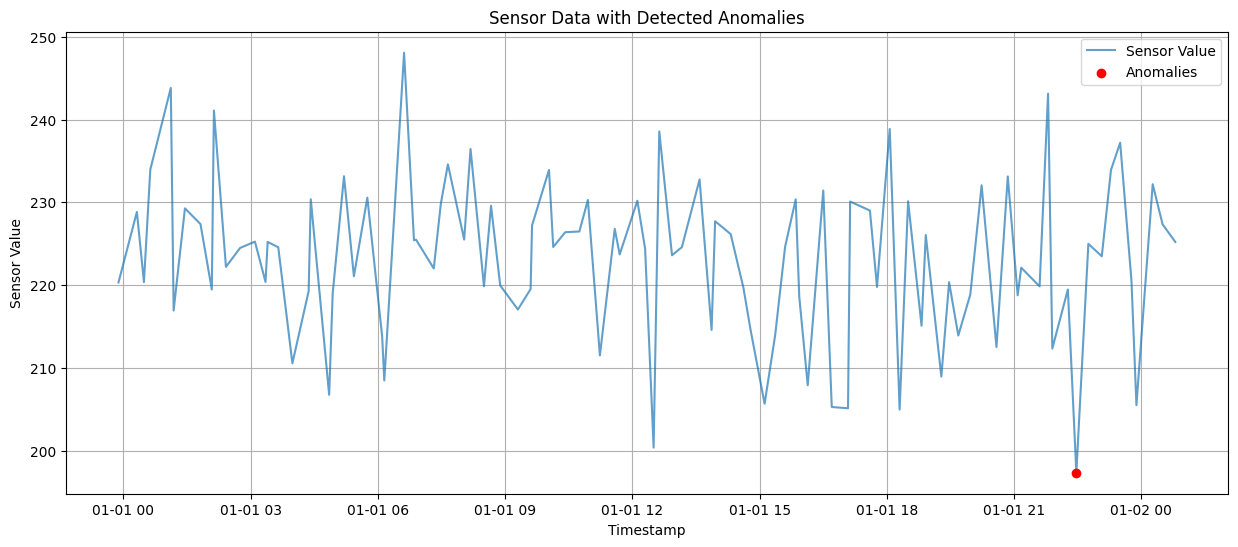

In [111]:
# Line Plot with Anomalies Highlighted

plt.figure(figsize=(15, 6))
plt.plot(p_iot_data["timestamp"], p_iot_data["sensor_value"], label="Sensor Value", alpha=0.7)

anomalies = p_iot_data[p_iot_data["is_anomaly"]]
plt.scatter(anomalies["timestamp"], anomalies["sensor_value"], color='red', label="Anomalies", zorder=5)

# Add labels and legend
plt.title("Sensor Data with Detected Anomalies")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Value")
plt.legend()
plt.grid()
plt.show()
